In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [5]:
df = pd.read_csv('/users/Petrov/Repositories/courses_analysis/sample.csv')
print('shape: '+str(df.shape[0]))
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/users/Petrov/Repositories/courses_analysis/sample.csv'

In [18]:
data = df[['teach_rate', 'new_carr', 'advent', 'earn_more', 'chap_cnt', 'course_dur', 'chap_avg_dur']]

print('correlation with target:\n\n', data.corrwith(df.rate))
data.corr()

correlation with target:

 teach_rate      0.732397
new_carr        0.034195
advent          0.080321
earn_more      -0.071946
chap_cnt        0.169633
course_dur      0.090225
chap_avg_dur    0.014704
dtype: float64


,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur
teach_rate,1.000000,0.079175,0.068682,-0.079984,0.144847,0.078124,0.004437
new_carr,0.079175,1.000000,0.713541,0.212726,-0.063340,-0.081603,-0.056735
advent,0.068682,0.713541,1.000000,0.514367,-0.118167,-0.036315,0.004889
earn_more,-0.079984,0.212726,0.514367,1.000000,0.016702,0.043287,0.032435
chap_cnt,0.144847,-0.063340,-0.118167,0.016702,1.000000,0.418041,0.026770
course_dur,0.078124,-0.081603,-0.036315,0.043287,0.418041,1.000000,0.887019
chap_avg_dur,0.004437,-0.056735,0.004889,0.032435,0.026770,0.887019,1.000000


normilizing float features:

In [19]:
for feature in data.columns:
    max_val = data[feature].max()
    min_val = data[feature].min()
    data[feature] = data[feature].apply(lambda x: (x-min_val)/(max_val-min_val))
    
data.head()

/Library/Python/3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur
0,0.939535,0.388889,0.363636,0.035088,0.538462,0.140741,0.108571
1,0.948837,0.277778,0.272727,0.035088,0.538462,0.140741,0.108571
2,0.939535,0.319444,0.285714,0.087719,0.461538,0.140741,0.126667
3,0.953488,0.319444,0.298701,0.052632,0.384615,0.111111,0.120000
4,0.860465,0.416667,0.376623,NaN,0.230769,0.074074,0.133333


а теперь старый добрый метод: просто возьмем и все нахуй начнем подгонять, потому что на этих данных нихуя не обучить ничего

In [16]:
data = data.assign(rate=df.rate)

koefs = {'k': [], 'b': []}
for col in data.columns[:-1]:
    mean = data[col].mean()
    std = data[col].std()
    
    min_delta = 999
    x1, y1 = 0, 0
    for x, y in zip(data[col], data.rate):
        if abs(x - mean) < min_delta:
            min_delta = abs(x - mean)
            x1 = x
            y1 = y
            
    x2, y2 = 0, data[col].min()
    
    k = (y2-y1)/(x2-x1)
    b = y1-k*x1
    
    x_points = np.arange(0., 1.1, 0.1)
    y_points = x_points
    for i in range(y_points.shape[0]):
        y_points[i] = x_points[i]*k+b
    
    plot = plt.plot()
    plt.scatter(data[col], data.rate)
    plt.plot(x_points, y_points)
    plt.show()
    

TypeError: 'int' object is not iterable

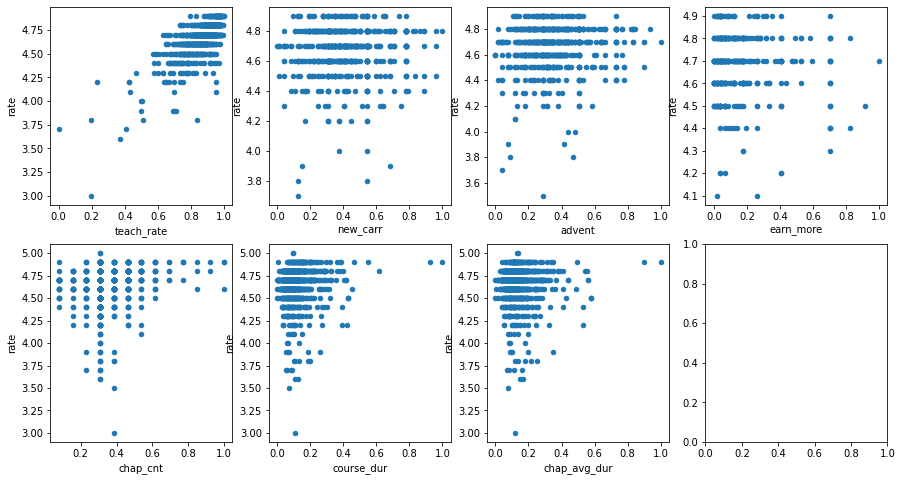

In [20]:
data = data.assign(rate=df.rate)

nrows = math.ceil((len(data.columns)-1)/4)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, 4*nrows))
for idx, feature in enumerate(data.columns[:-1]):
    data.plot(feature, 'rate', subplots=True, kind='scatter', ax=axes[idx // 4, idx % 4])

adding categorial features as set of binary features

In [7]:
for feature_name in ['level', 'lang']:
    for value in df[feature_name].dropna().unique():
        data[feature_name+'=='+str(value)] = df[feature_name].apply(lambda x: 1 if x == value else 0)

data.head()

,teach_rate,new_carr,advent,earn_more,chap_cnt,course_dur,chap_avg_dur,rate,level==1.0,level==2.0,level==3.0,lang==2.0,lang==1.0
0,4.85,39.0,39.0,12.0,7,1140,162.857143,4.8,0,0,0,1,0
1,4.87,31.0,32.0,12.0,7,1140,162.857143,4.9,0,0,0,1,0
2,4.85,34.0,33.0,15.0,6,1140,190.000000,4.8,0,0,0,1,0
3,4.88,34.0,34.0,13.0,5,900,180.000000,4.8,0,0,0,1,0
4,4.68,41.0,40.0,NaN,3,600,200.000000,4.7,1,0,0,1,0


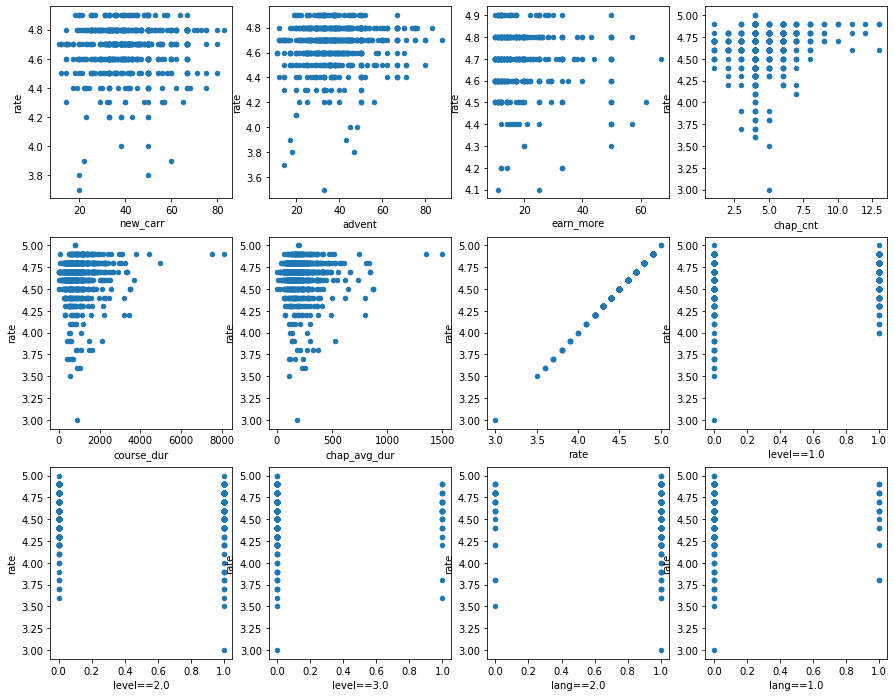

In [8]:
nrows = math.ceil((len(data.columns)-1)/4)
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(15, 4*nrows))
for idx, feature in enumerate(data.columns[1:]):
    data.plot(feature, 'rate', subplots=True, kind='scatter', ax=axes[idx // 4, idx % 4])

In [9]:
data = data.dropna()

target = data.rate
data.drop(['rate'], axis='columns', inplace=True)

print(target.head())
print(data.head())

0    4.8
1    4.9
2    4.8
3    4.8
5    4.5
Name: rate, dtype: float64
   teach_rate  new_carr  advent  earn_more  chap_cnt  course_dur  \
0        4.85      39.0    39.0       12.0         7        1140   
1        4.87      31.0    32.0       12.0         7        1140   
2        4.85      34.0    33.0       15.0         6        1140   
3        4.88      34.0    34.0       13.0         5         900   
5        4.50      46.0    45.0       19.0         4         960   

   chap_avg_dur  level==1.0  level==2.0  level==3.0  lang==2.0  lang==1.0  
0    162.857143           0           0           0          1          0  
1    162.857143           0           0           0          1          0  
2    190.000000           0           0           0          1          0  
3    180.000000           0           0           0          1          0  
5    240.000000           1           0           0          1          0  


/Users/petrov/Library/Python/3.7/lib/python/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### models

train_test_split

In [73]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5873494204067768

KFlod

In [1]:
models = []
scores = []
for train_index, test_index in model_selection.KFold(n_splits=3, random_state=42, shuffle=True).split(data_1):
    model = LinearRegression()
    x_train, x_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    model.fit(x_train, y_train)
    # adding to list of models:
    models.append(model)
    scores.append(model.score(x_test, y_test))

NameError: name 'model_selection' is not defined

In [92]:
for score in scores:
    print(score)

0.3866369469410096
0.5046422343332237
0.5118218528727336


In [85]:
i = model_selection.KFold(n_splits=3, random_state=1, shuffle=True).split(data_1)

for ix , iy in i:
    print(type(ix))
    


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [105]:
x_train = x[:200]
y_train = y[:200]
x_test = x[200:]
y_test = y[200:]

model = LinearRegression()
model.fit(x_train, y_train)
p = model.predict(x_test)

In [115]:
s = 0
k = 0
for ax, y in zip(p, y_train):
    s += (y-ax)**2
    k += 1
    
print(s/k)

0.03859000249837565


In [15]:
from sklearn.linear_model import LassoCV

In [18]:
data_2 = (data.dropna())[['rate', 'teach_rate', 'level==1.0', 'level==2.0', 'level==3.0']]
x = data_2[data_2.columns[1:]]
y = data_2.rate

alphas = np.apply_along_axis(lambda x: x/10000, 0, np.arange(1, 100, 5))
#alphas = np.arange(1, 100, 5)

model = LassoCV(alphas=alphas, cv=3, random_state=1)
model.fit(x, y)

LassoCV(alphas=array([0.0001, 0.0006, 0.0011, 0.0016, 0.0021, 0.0026, 0.0031, 0.0036,
       0.0041, 0.0046, 0.0051, 0.0056, 0.0061, 0.0066, 0.0071, 0.0076,
       0.0081, 0.0086, 0.0091, 0.0096]),
        cv=3, random_state=1)

In [19]:
model.mse_path_

array([[0.00442597, 0.00473454, 0.00452948],
       [0.00442597, 0.00466631, 0.00452948],
       [0.00442597, 0.00444685, 0.00447438],
       [0.00430626, 0.00424065, 0.00421124],
       [0.00401703, 0.00404772, 0.00396402],
       [0.0037449 , 0.00386805, 0.00373272],
       [0.00348988, 0.00370164, 0.00351734],
       [0.00325195, 0.00354849, 0.00331788],
       [0.00303113, 0.00340861, 0.00313433],
       [0.0028274 , 0.00328199, 0.0029667 ],
       [0.00264078, 0.00316863, 0.002815  ],
       [0.00247115, 0.00306853, 0.00267921],
       [0.00231701, 0.0029817 , 0.00255934],
       [0.00218257, 0.00290813, 0.00245539],
       [0.00206784, 0.0028503 , 0.00236735],
       [0.00196963, 0.0027912 , 0.00229395],
       [0.00187051, 0.0027545 , 0.00222305],
       [0.00179555, 0.00274018, 0.00214599],
       [0.00174475, 0.00274826, 0.00206777],
       [0.0017181 , 0.00277873, 0.00201793]])

In [3]:
import requests

response = requests.get('https://cabinet.miem.hse.ru/public-api/projects')
response.encoding = 'utf-8'

with open('json_miem_cat.json', 'w') as f:
    f.write(response.text)

In [5]:
which python

SyntaxError: invalid syntax (<ipython-input-5-d8603f9f9bc3>, line 1)